In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os



/tmp/ipykernel_435109/1852430019.py:85: UserWarning: 
The markers list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(
/tmp/ipykernel_435109/1852430019.py:101: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)


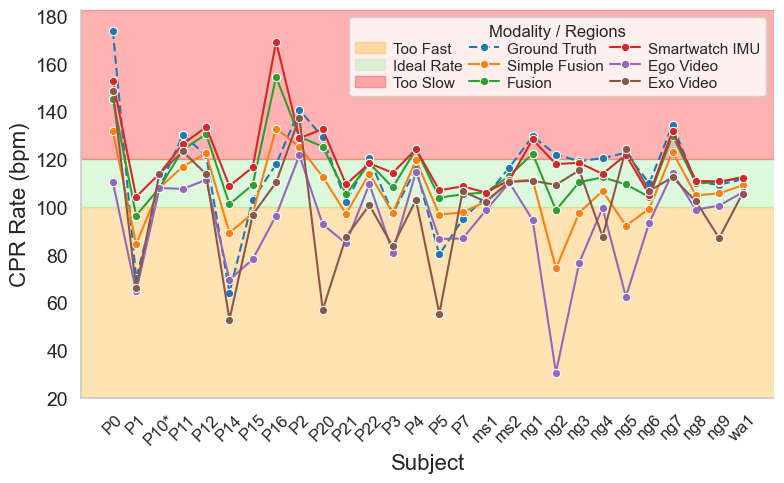

/tmp/ipykernel_435109/1852430019.py:126: UserWarning: 
The markers list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(
/tmp/ipykernel_435109/1852430019.py:139: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)


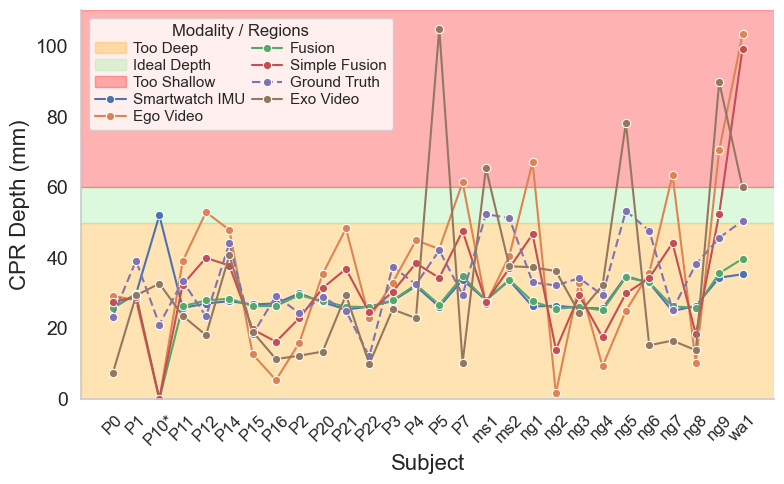

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# save high resolution plots
output_dir = './plots'
os.makedirs(output_dir, exist_ok=True) 

# 1) Load the combined CSV (update this path)
df = pd.read_csv('./data/combined_results.csv')

# 2) Identify rate & depth columns by suffix
rate_cols  = [c for c in df.columns if c.endswith('_rate')]
depth_cols = [c for c in df.columns if c.endswith('_depth')]

# 3) Melt to long format for seaborn
rate_df = df.melt(
    id_vars='Subject',
    value_vars=rate_cols,
    var_name='Modality',
    value_name='avg_rate'
)
rate_df['Modality'] = (
    rate_df['Modality']
    .str.replace('^avg_', '', regex=True)
    .str.replace('_rate$', '', regex=True)
)
rate_df['Modality'] = rate_df['Modality'].replace({'gt': 'Ground Truth'})
rate_df['Modality'] = rate_df['Modality'].replace({'simple_fusion': 'Simple Fusion'})
rate_df['Modality'] = rate_df['Modality'].replace({'fusion': 'Fusion'})
rate_df['Modality'] = rate_df['Modality'].replace({'smartwatch': 'Smartwatch IMU'})
rate_df['Modality'] = rate_df['Modality'].replace({'video': 'Ego Video'})
rate_df['Modality'] = rate_df['Modality'].replace({'exo': 'Exo Video'})

# update subject 'P10' to 'P10*' 
rate_df['Subject'] = rate_df['Subject'].replace({'P10': 'P10*'})


depth_df = df.melt(
    id_vars='Subject',
    value_vars=depth_cols,
    var_name='Modality',
    value_name='avg_depth'
)
depth_df['Modality'] = (
    depth_df['Modality']
    .str.replace('^avg_', '', regex=True)
    .str.replace('_depth$', '', regex=True)
)
depth_df['Modality'] = depth_df['Modality'].replace({'gt': 'Ground Truth'})
depth_df['Modality'] = depth_df['Modality'].replace({'simple_fusion': 'Simple Fusion'})
depth_df['Modality'] = depth_df['Modality'].replace({'fusion': 'Fusion'})
depth_df['Modality'] = depth_df['Modality'].replace({'smartwatch': 'Smartwatch IMU'})
depth_df['Modality'] = depth_df['Modality'].replace({'video': 'Ego Video'})
depth_df['Modality'] = depth_df['Modality'].replace({'exo': 'Exo Video'})

# update subject 'P10' to 'P10*'
depth_df['Subject'] = depth_df['Subject'].replace({'P10': 'P10*'})

# 4) Dash mappings: dashed for GT, solid for others
dashes_rate  = {mod: [4, 2] if mod == 'Ground Truth' else [] for mod in rate_df['Modality'].unique()}
dashes_depth = {mod: [4, 2] if mod == 'Ground Truth' else [] for mod in depth_df['Modality'].unique()}


sns.set(style="whitegrid")

# ---- 5) Plot Average CPR Rate with colored regions ----
fig, ax = plt.subplots(figsize=(8, 5))

# highlight rate regions
max_rate = rate_df['avg_rate'].max() * 1.05
ax.axhspan(20,   100,  color='orange', alpha=0.3, label='Too Fast')
ax.axhspan(100, 120,  color='lightgreen',  alpha=0.3, label='Ideal Rate')
ax.axhspan(120, max_rate, color='red',    alpha=0.3, label='Too Slow')

# plt.axhspan(110, 130, color='lightgreen', alpha=0.3, label='')
# plt.axhspan(130, 180, color='orange', alpha=0.3, label='')
# plt.axhspan(180, 200, color='red', alpha=0.3, label='')


# start y axis at 20 bpm

# draw the lines on top
sns.lineplot(
    data=rate_df,
    x='Subject', y='avg_rate',
    hue='Modality', style='Modality',
    dashes=dashes_rate,
    markers='o',
    markersize=6,
    ax=ax,
    palette="tab10"
)



# ax.set_title('Average CPR Rate by Modality')
ax.set_xlabel('Subject', fontsize=16)
ax.set_ylabel('CPR Rate (bpm)', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
ax.tick_params(axis='y', labelsize=14)
ax.set_ylim(20, max_rate)
# split legend to two columns and reduce space between columns
plt.legend(title='Modality / Regions', loc='upper right', ncol=3,     columnspacing=0.4,    # default is 2.0, shrink to reduce col gap
    handletextpad=0.5,    # space between marker and label
    labelspacing=0.2      # vertical space between entries
)
plt.grid(False)
sns.despine()
plt.tight_layout()
plt.show()
fig.savefig(os.path.join(output_dir, 'avg_cpr_rate_by_modality.png'), dpi=600)


# ---- 6) Plot Average CPR Depth with colored regions ----
fig, ax = plt.subplots(figsize=(8,5))

# highlight depth regions
max_depth = depth_df['avg_depth'].max() * 1.05
ax.axhspan(0,   50,  color='orange', alpha=0.3, label='Too Deep')
ax.axhspan(50,  60,  color='lightgreen',  alpha=0.3, label='Ideal Depth')
ax.axhspan(60,  max_depth, color='red',    alpha=0.3, label='Too Shallow')

# draw the lines on top
sns.lineplot(
    data=depth_df,
    x='Subject', y='avg_depth',
    hue='Modality', style='Modality',
    dashes=dashes_depth,
    markers='o',
    markersize=6,
    ax=ax
)

# ax.set_title('Average CPR Depth by Modality')
ax.set_xlabel('Subject', fontsize=16)
ax.set_ylabel('CPR Depth (mm)', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
ax.tick_params(axis='y', labelsize=14)
ax.set_ylim(0, max_depth)
ax.legend(title='Modality / Regions', loc='upper left', ncol=2, 
    columnspacing=0.4,    # default is 2.0, shrink to reduce col gap
    handletextpad=0.5,    # space between marker and label
    labelspacing=0.2      # vertical space between entries
)
plt.grid(False)
sns.despine()
plt.tight_layout()
plt.show()


fig.savefig(os.path.join(output_dir, 'avg_cpr_depth_by_modality.png'), dpi=600)


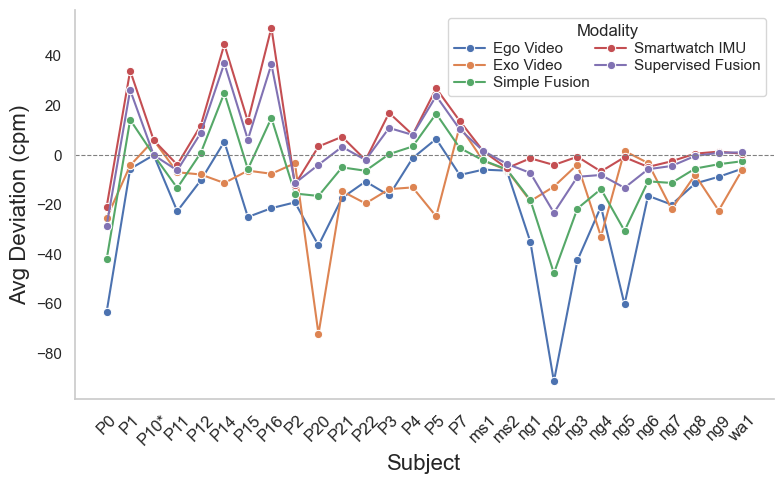

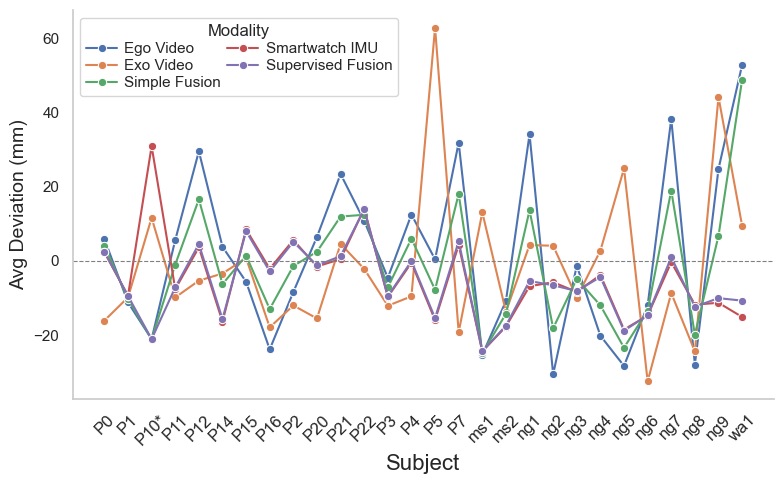

In [69]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# save high resolution plots
output_dir = './plots'
os.makedirs(output_dir, exist_ok=True) 

# 1) Load the combined CSV
df = pd.read_csv('./data/combined_results.csv')

# 2) Identify & rename columns
# ---------------------------------
# Rate
rate_cols = [c for c in df.columns if c.endswith('_rate')]
rate_df = df[['Subject'] + rate_cols].copy()
rate_df = rate_df.rename(columns={
    'avg_gt_rate': 'Ground Truth',
    'avg_simple_fusion_rate': 'Simple Fusion',
    'avg_fusion_rate': 'Supervised Fusion',
    'avg_smartwatch_rate': 'Smartwatch IMU',
    'avg_video_rate': 'Ego Video',
    'avg_exo_rate': 'Exo Video'
})

# update subject 'P10' to 'P10*' 
rate_df['Subject'] = rate_df['Subject'].replace({'P10': 'P10*'})


# Depth
depth_cols = [c for c in df.columns if c.endswith('_depth')]
depth_df = df[['Subject'] + depth_cols].copy()
depth_df = depth_df.rename(columns={
    'avg_gt_depth': 'Ground Truth',
    'avg_simple_fusion_depth': 'Simple Fusion',
    'avg_fusion_depth': 'Supervised Fusion',
    'avg_smartwatch_depth': 'Smartwatch IMU',
    'avg_video_depth': 'Ego Video',
    'avg_exo_depth': 'Exo Video'
})

depth_df['Subject'] = depth_df['Subject'].replace({'P10': 'P10*'})



# 3) Melt to long form & compute deviations
# -----------------------------------------
# Rate deviations (signed and absolute)
rate_long = rate_df.melt(id_vars='Subject', var_name='Modality', value_name='avg_rate')
# pivot to subtract
rate_pivot = rate_long.pivot(index='Subject', columns='Modality', values='avg_rate')
rate_dev = rate_pivot.subtract(rate_pivot['Ground Truth'], axis=0)
rate_dev_long = rate_dev.reset_index().melt(id_vars='Subject', var_name='Modality', value_name='rate_dev')
rate_dev_long['rate_dev_abs'] = rate_dev_long['rate_dev'].abs()
# drop the Ground Truth row
rate_dev_long = rate_dev_long[rate_dev_long['Modality'] != 'Ground Truth']



# Depth deviations
depth_long = depth_df.melt(id_vars='Subject', var_name='Modality', value_name='avg_depth')
depth_pivot = depth_long.pivot(index='Subject', columns='Modality', values='avg_depth')
depth_dev = depth_pivot.subtract(depth_pivot['Ground Truth'], axis=0)
depth_dev_long = depth_dev.reset_index().melt(id_vars='Subject', var_name='Modality', value_name='depth_dev')
depth_dev_long['depth_dev_abs'] = depth_dev_long['depth_dev'].abs()
depth_dev_long = depth_dev_long[depth_dev_long['Modality'] != 'Ground Truth']



sns.set(style="whitegrid")


# —— Option A: Signed-deviation lineplots ——
# Rate signed deviation by subject
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=rate_dev_long,
    x='Subject', y='rate_dev',
    hue='Modality', marker='o'
)
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')
# plt.title('Average CPR Rate Deviation from Ground Truth', fontsize=16)
plt.xlabel('Subject', fontsize=16)
plt.ylabel('Avg Deviation (cpm)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)

# split legend to two columns and reduce space between columns
plt.legend(title='Modality', loc='upper right', ncol=2,     columnspacing=0.4,    # default is 2.0, shrink to reduce col gap
    handletextpad=0.5,    # space between marker and label
    labelspacing=0.2      # vertical space between entries
)
plt.tight_layout()
plt.grid(False)
sns.despine()
plt.savefig(os.path.join(output_dir, 'rate_signed_deviation.png'), dpi=300, bbox_inches='tight')
plt.show()

# Depth signed deviation by subject
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=depth_dev_long,
    x='Subject', y='depth_dev',
    hue='Modality', marker='o'
)
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')
# plt.title('Signed CPR Depth Deviation from Ground Truth', fontsize=16)
plt.ylabel('Avg Deviation (mm)', fontsize=14)
plt.xlabel('Subject', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
# split legend to two columns and reduce space between columns
plt.legend(title='Modality', loc='upper left', ncol=2,     columnspacing=0.4,    # default is 2.0, shrink to reduce col gap
    handletextpad=0.5,    # space between marker and label
    labelspacing=0.2      # vertical space between entries
)
plt.tight_layout()

plt.grid(False)
sns.despine()

plt.savefig(os.path.join(output_dir, 'depth_signed_deviation.png'), dpi=300, bbox_inches='tight')
plt.show()


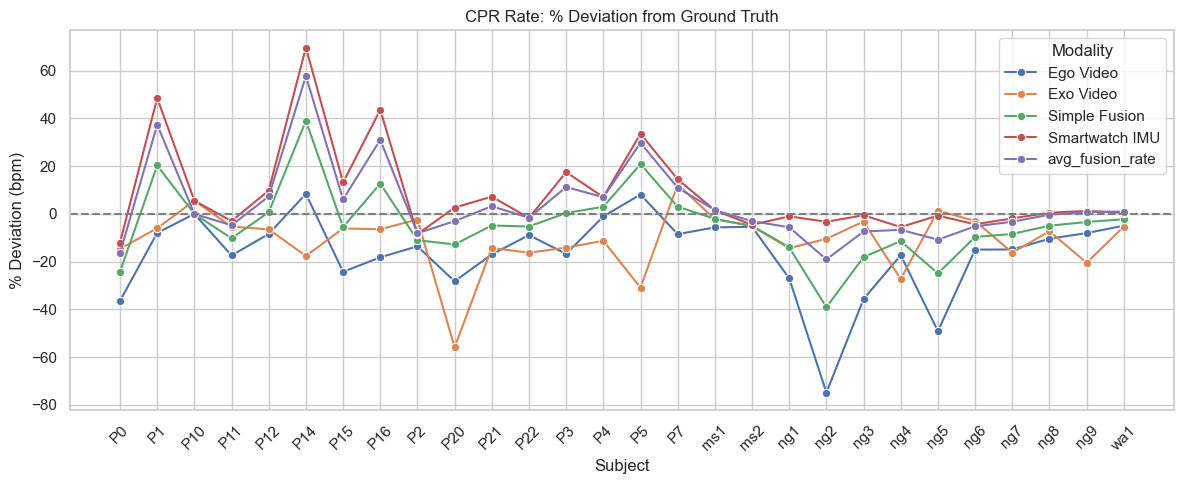

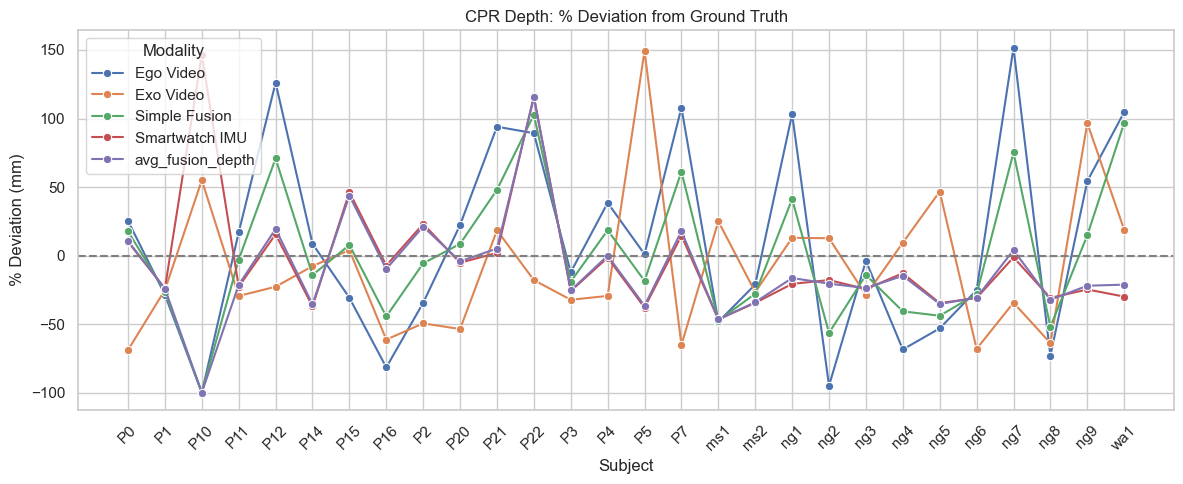

In [70]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# save high resolution plots
output_dir = './plots'
os.makedirs(output_dir, exist_ok=True) 

# 1) Load the combined CSV
df = pd.read_csv('./data/combined_results.csv')

# 2) Identify & rename columns
rate_cols = [c for c in df.columns if c.endswith('_rate')]
rate_df = df[['Subject'] + rate_cols].rename(columns={
    'avg_gt_rate': 'Ground Truth',
    'avg_simple_fusion_rate': 'Simple Fusion',
    'avg_fused_rate': 'Fusion',
    'avg_smartwatch_rate': 'Smartwatch IMU',
    'avg_video_rate': 'Ego Video',
    'avg_exo_rate': 'Exo Video'
})

depth_cols = [c for c in df.columns if c.endswith('_depth')]
depth_df = df[['Subject'] + depth_cols].rename(columns={
    'avg_gt_depth': 'Ground Truth',
    'avg_simple_fusion_depth': 'Simple Fusion',
    'avg_fused_depth': 'Fusion',
    'avg_smartwatch_depth': 'Smartwatch IMU',
    'avg_video_depth': 'Ego Video',
    'avg_exo_depth': 'Exo Video'
})

# 3) Compute percent deviations
# --------------------------------
# Rate
rate_long = rate_df.melt(id_vars='Subject', var_name='Modality', value_name='avg_rate')
rate_pivot = rate_long.pivot(index='Subject', columns='Modality', values='avg_rate')
# percent deviation
rate_pct = (rate_pivot.subtract(rate_pivot['Ground Truth'], axis=0)
                     .divide(rate_pivot['Ground Truth'], axis=0)
                     * 100)
rate_pct_long = (
    rate_pct
    .reset_index()
    .melt(id_vars='Subject', var_name='Modality', value_name='rate_pct_dev')
)
rate_pct_long = rate_pct_long[rate_pct_long['Modality'] != 'Ground Truth']

# Depth
depth_long = depth_df.melt(id_vars='Subject', var_name='Modality', value_name='avg_depth')
depth_pivot = depth_long.pivot(index='Subject', columns='Modality', values='avg_depth')
depth_pct = (depth_pivot.subtract(depth_pivot['Ground Truth'], axis=0)
                       .divide(depth_pivot['Ground Truth'], axis=0)
                       * 100)
depth_pct_long = (
    depth_pct
    .reset_index()
    .melt(id_vars='Subject', var_name='Modality', value_name='depth_pct_dev')
)
depth_pct_long = depth_pct_long[depth_pct_long['Modality'] != 'Ground Truth']

sns.set(style="whitegrid")

# —— Percent‐deviation lineplots —— 
# Rate % deviation
plt.figure(figsize=(12, 5))
sns.lineplot(
    data=rate_pct_long,
    x='Subject', y='rate_pct_dev',
    hue='Modality', marker='o'
)
plt.axhline(0, color='gray', linestyle='--')
plt.title('CPR Rate: % Deviation from Ground Truth')
plt.ylabel('% Deviation (bpm)')
plt.xticks(rotation=45)
plt.legend(title='Modality')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'rate_pct_deviation.png'), dpi=300, bbox_inches='tight')
plt.show()

# Depth % deviation
plt.figure(figsize=(12, 5))
sns.lineplot(
    data=depth_pct_long,
    x='Subject', y='depth_pct_dev',
    hue='Modality', marker='o'
)
plt.axhline(0, color='gray', linestyle='--')
plt.title('CPR Depth: % Deviation from Ground Truth')
plt.ylabel('% Deviation (mm)')
plt.xticks(rotation=45)
plt.legend(title='Modality')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'depth_pct_deviation.png'), dpi=300, bbox_inches='tight')
plt.show()
